In [1]:
#This is importing the data from website source using API
import requests

# Toronto Open Data is stored in a CKAN instance. It's APIs are documented here:
# https://docs.ckan.org/en/latest/api/

# To hit our API, you'll be making requests to:
base_url = "https://ckan0.cf.opendata.inter.prod-toronto.ca"

# Datasets are called "packages". Each package can contain many "resources"
# To retrieve the metadata for this package and its resources, use the package name in this page's URL:
url = base_url + "/api/3/action/package_show"
params = {"id": "pcard-expenditures"}
package = requests.get(url, params=params).json()

# To get resource data:
for idx, resource in enumerate(package["result"]["resources"]):

    # To get metadata for non datastore_active resources:
    if not resource["datastore_active"]:
        url = base_url + "/api/3/action/resource_show?id=" + resource["id"]
        resource_metadata = requests.get(url).json()

        # From here, you can use the "url" attribute to download this file
        file_url = resource_metadata["result"]["url"]
        file_response = requests.get(file_url)
        
        # Assuming the filename is present in the URL, you can extract it
        # For example, if the URL is "https://example.com/files/data.csv",
        # then you can extract "data.csv" as the filename
        filename = file_url.split("/")[-1]

        # Save the downloaded file to your local directory
        with open(filename, "wb") as file:
            file.write(file_response.content)
        
        print(f"Downloaded {filename}")

Downloaded pcard_expenditures_readme.xls
Downloaded expenditures.zip


In [345]:
#pip install mplcursors

In [344]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [2]:
#checking the file extensions
import os

# Path to the directory containing the files
folder_path = "/Users/xaichotic/Desktop/BMA/expenditures"

# Get a list of all files in the directory
all_files = os.listdir(folder_path)

# Extract unique extensions
unique_extensions = set(os.path.splitext(file)[1] for file in all_files if os.path.isfile(os.path.join(folder_path, file)))

# Print unique extensions
print("Unique file extensions:")
for extension in unique_extensions:
    print(extension)

Unique file extensions:
.XLSX
.xls
.xlsx


In [3]:
#this is the code to combine all the excel files into a single CSV file.
#combined_df will use this data frame fro the combined files

import os
import pandas as pd

# Path to the directory containing the files
folder_path = "/Users/xaichotic/Desktop/BMA/expenditures"
output_folder_path = "/Users/xaichotic/Desktop/BMA"

# Get a list of all files with specified extensions in the directory
file_extensions = ['.xls', '.xlsx', '.XLSX']
data_files = [file for file in os.listdir(folder_path) if any(file.lower().endswith(ext) for ext in file_extensions)]

# Initialize a list to store DataFrames from different files
data_frames = []

# Loop through each data file, read the data, and store it in the list
for file in data_files:
    file_path = os.path.join(folder_path, file)
    try:
        if file.lower().endswith('.xls'):
            df = pd.read_excel(file_path, engine='xlrd')  # Use xlrd for .xls files
        else:
            df = pd.read_excel(file_path, engine='openpyxl')  # Use openpyxl for .xlsx and .XLSX files
        data_frames.append(df)
    except Exception as e:
        print(f"Error reading file {file}: {e}")

# Combine all DataFrames in the list into a single DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)

# Save the combined DataFrame to a CSV file
combined_csv_path = os.path.join(output_folder_path, "combined_data.csv")
combined_df.to_csv(combined_csv_path, index=False)

print(f"Combined data saved to {combined_csv_path}")


Combined data saved to /Users/xaichotic/Desktop/BMA/combined_data.csv


In [5]:
#checking the columns of the dataframe.

combined_df.columns

Index(['Division', 'Batch-Transaction ID', 'Transaction Date',
       'Card Posting Dt', 'Merchant Name', 'Transaction Amt.', 'Trx Currency',
       'Original Amount', 'Original Currency', 'G/L Account',
       'G/L Account Description', 'Cost Centre / WBS Element',
       'Cost Centre / WBS Element Description', 'Merchant Type',
       'Merchant Type Description', 'Purpose', 'Batch Transaction ID',
       'GL Account Description', 'Cost Centre / WBS Element / Order',
       'Cost Centre / WBS Element / Order Description', 'Transaction Currency',
       'G/L Account Decription', 'Cost Centre /WBS Element',
       'Cost Centre /WBS Element Description', 'Merchant type description',
       'Cost Centre / WBS Element / Order No.',
       'Cost Centre / WBS Element / Order No. Description', 'Trx.Currency',
       'Cost Center / WBS Element / Order',
       'Cost Center / WBS Element / Order Description', 'Exp Type Desc',
       'Cost Centre / WBS Element / Order #',
       'Cost Centre / W

In [6]:
#Install this as there is very old version og excel .xls

#pip install xlrd

Exploratory Data Analysis

In [6]:
#this function let's you see the sample statistics of the features.

combined_df.describe()

#"Unnamed: 16" and "unnamed: 17" columns might be a human error. 
#here there are no values in the column "Unnamed: 16"
# and only one numeric value "4" in "Unnamed: 17"
#we should delete this

,Transaction Amt.,Original Amount,Merchant Type,Merchant\n Type,Transaction Amount,Merchant Type (MCC),Original\n Amount,Unnamed: 16,Unnamed: 17
count,4.543870e+05,4.902900e+05,380084.000000,2947.000000,34986.000000,29719.000000,2842.000000,0.0,1.0
mean,5.745761e+02,5.727822e+02,5944.171996,6078.087886,516.612867,5764.555974,484.508181,NaN,4.0
std,1.358323e+04,1.272302e+04,1479.300606,1621.660013,3200.760472,1254.320930,8412.139439,NaN,NaN
min,-3.039042e+04,-3.765082e+04,0.000000,742.000000,-8362.000000,742.000000,-950.580000,NaN,4.0
25%,3.306000e+01,3.378000e+01,5200.000000,5200.000000,40.680000,5200.000000,27.120000,NaN,4.0
50%,9.868000e+01,1.000000e+02,5411.000000,5411.000000,116.960000,5411.000000,91.550000,NaN,4.0
75%,3.225350e+02,3.270775e+02,5970.000000,7333.000000,395.127500,5943.000000,306.150000,NaN,4.0
max,1.691099e+06,1.627843e+06,9402.000000,9402.000000,324240.260000,9402.000000,447236.980000,NaN,4.0


In [7]:
#Dropping columns

import os
import pandas as pd

# Path to the directory containing the files
folder_path = "/Users/xaichotic/Desktop/BMA/expenditures"

# Get a list of all files in the directory
all_files = os.listdir(folder_path)

# List of target column names
#target_columns = ['Unknown group', 'Exp Type Desc', 'Long Text', 'Unnamed: 16', 'Unnamed: 17', 'G/L Expense Description']

#Reducing the target columns
target_columns = ['Unknown group','Unnamed: 16', 'Unnamed: 17']


# Iterate through all files
for file in all_files:
    file_path = os.path.join(folder_path, file)
    if os.path.isfile(file_path):  # Check if it's a file (not a directory)
        # Check if the file has one of the specified extensions
        if file.lower().endswith(('.xls', '.xlsx')):
            try:
                # Read the first sheet of the Excel file
                df = pd.read_excel(file_path, sheet_name=0)
                # Check if any of the target columns are present in the DataFrame
                if any(col in df.columns for col in target_columns):
                    print(f"File: {file} contains the target columns.")
            except Exception as e:
                print(f"Error reading {file}: {e}")
                
#They are all in the PCardExpenses_201112_Final.xls 
#instead of deleting it manually, we will automate this so it could be applied to other files in the future. 

File: PCardExpenses_201112_Final.xls contains the target columns.


In [8]:
#this will rename the column names based from the pcard_expenditures_readme file

import os
import pandas as pd

# List of target column names and their corresponding variations
column_mapping = {
    'DIVISION': ['Division', 'Division ', 'Divison'],
    'BATCH-TRANSACTION ID': ['Batch-Transaction ID', 'Batch Transaction ID'],
    'TRANSACTION DATE': ['Transaction Date', 'Transaction\n Date'],
    'CARD POSTING DATE': ['Card Posting Dt', 'Card Posting Date'],
    'MERCHANT NAME': ['Merchant Name'],
    'TRANSACTION AMOUNT': ['Transaction Amt.', 'Transaction Amount'],
    'TRANSACTION CURRENCY': ['Trx Currency', 'Transaction Currency', 'Trx.Currency', 'Trx. Currency', 'Tr Currency'],
    'ORIGINAL AMOUNT': ['Original Amount', 'Original\n Amount'],
    'ORIGINAL CURRENCY': ['Original Currency', 'Original\n Currency'],
    'G/L ACCOUNT': ['G/L Account'],
    'G/L ACCOUNT DESCRIPTION': ['G/L Account Description', 'GL Account Description',
                                'G/L Account Decription', 'G/L Account Discription',
                                ' G/L Account Description', 'Exp Type Desc', 'G/L Expense Description', 'Long Text'],
    'COST CENTRE/WBS ELEMENT/ORDER': ['Cost Centre / WBS Element', 'Cost Centre /WBS Element',
                                      'Cost Centre / WBS Element / Order', 'Cost Centre / WBS Element / Order #',
                                      'Cost Centre/WBS Element', 'Cost Centre/ \nWBS Element',
                                      'Cost Centre/\nWBS Element', 'Cost Centre/WBS\nElement',
                                      'Cost Centre / WBS Element / Work Order Number',
                                      'Cost Centre / WBS Elelment', 'Cost Centre / WBS Element ',
                                      'Cost Centre / WBS\n Element', 'Cost Centre /  WBS Element',
                                      'Cost Centre/ WBS Element / Order', 'Cost Centre / WBS Element / Order No.',
                                      'Cost Center / WBS Element / Order', 'Cost Centre / WBS Element / Order ',
                                      'Cost Centre /  WBS Element / Order No.',
                                      'Cost Centre /WBS Element / Order','Cost Center / WBS Element / Order #',
                                      'Cost Centre / WBS Element / Order No'],
    'COST CENTRE/WBS ELEMENT/ORDER DESCRIPTION': ['Cost Centre / WBS Element Description',
                                                  'Cost Centre / WBS Element / Order Description',
                                                  'Cost Centre /WBS Element Description',
                                                  'Cost Centre / WBS Element / Order # Decription',
                                                  'Cost Centre/WBS Element Description',
                                                  'Cost Centre/ WBS Element Descrption',
                                                  'Cost Centre/WBS Element/Work Order Number Description',
                                                  'Cost Centre/WBS Element Discriprion',
                                                  'Cost Centre / WBS Element / Order # Description',
                                                  'Cost Centre / WBS Element Descrption',
                                                  'Cost Centre / WBS Elelment Description',
                                                  'Cost Centre / WBS Element /Order Description',
                                                  'Cost Centre/WBS Element Description ',
                                                  'Cost Centre /  WBS Element Description',
                                                  'Cost Centre/ WBS Element / Order Description',
                                                  'Cost Centre / WBS Element / Order No. Description',
                                                  'Cost Center / WBS Element / Order Description',
                                                  'Cost Centre /  WBS Element / Order No. Decription',
                                                  'Cost Center / WBLS Element / Order Description',
                                                  'Cost Centre /WBS Element / Order Description',
                                                  'Cost Center / WBS Element / Order # Description'],
    'MERCHANT TYPE (MCC)': ['Merchant Type', 'Merchant\n Type', 'Merchant Type (MCC)'],
    'MERCHANT TYPE DESCRIPTION': ['Merchant Type Description', 'Merchant type description'],
    'PURPOSE': ['Purpose']
}

# Path to the directory containing the Excel files
input_folder_path = "/Users/xaichotic/Desktop/BMA/expenditures"
output_folder_path = "/Users/xaichotic/Desktop/BMA/expenditures_clean"

# Create the output folder if it doesn't exist
os.makedirs(output_folder_path, exist_ok=True)

# Get a list of all Excel files in the input directory
excel_files = [file for file in os.listdir(input_folder_path) if file.lower().endswith(('.xls', '.xlsx'))]

# Process each Excel file
for file in excel_files:
    file_path = os.path.join(input_folder_path, file)
    df = pd.read_excel(file_path)
    
    # Convert column names to lowercase and remove leading/trailing spaces
    df.columns = df.columns.str.lower().str.strip()

    # Rename columns using the provided column_mapping
    for target_col, variations in column_mapping.items():
        for variation in variations:
            if variation.lower() in df.columns:
                df.rename(columns={variation.lower(): target_col}, inplace=True)
    
    # Save the DataFrame to CSV format in the output folder
    csv_file_name = os.path.splitext(file)[0] + ".csv"
    csv_file_path = os.path.join(output_folder_path, csv_file_name)
    df.to_csv(csv_file_path, index=False)

print("Conversion and renaming completed.")

Conversion and renaming completed.


In [9]:
#we will save the dataset again to new file for safe keeping

import os
import pandas as pd

# Path to the directory containing the cleaned CSV files
cleaned_folder_path = "/Users/xaichotic/Desktop/BMA/expenditures_clean"
folder_path = "/Users/xaichotic/Desktop/BMA"

# Get a list of all cleaned CSV files in the directory
csv_files = [file for file in os.listdir(cleaned_folder_path) if file.lower().endswith('.csv')]

# List to store cleaned DataFrames
cleaned_dataframes = []

# Load data from each cleaned CSV file
for file in csv_files:
    file_path = os.path.join(cleaned_folder_path, file)
    df = pd.read_csv(file_path)
    
    # Drop columns without header (name)
    df = df.dropna(axis=1, how='all')
    
    cleaned_dataframes.append(df)

# Concatenate cleaned DataFrames
combined_df = pd.concat(cleaned_dataframes, ignore_index=True)

# Save combined DataFrame to a CSV file
combined_csv_path = os.path.join(folder_path, 'combined_dataset.csv')
combined_df.to_csv(combined_csv_path, index=False)

print("Combined CSV file saved.")

Combined CSV file saved.


In [84]:
# #There are missing values because in each file, they have totaled the amount per division and
# #description (or group of merchant?). then summed it up again in the end, 
# #some have USD, GBP, and EUR. for simplicity, we will delete these "conversion"

# import os
# import pandas as pd

# # Path to the directory containing the cleaned CSV files
# cleaned_folder_path = "/Users/xaichotic/Desktop/BMA/expenditures_clean"

# # Get a list of all CSV files in the directory
# csv_files = [file for file in os.listdir(cleaned_folder_path) if file.lower().endswith('.csv')]

# # Loop through each CSV file and check for missing values
# for file in csv_files:
#     file_path = os.path.join(cleaned_folder_path, file)
#     df = pd.read_csv(file_path)
    
#     missing_columns = df.columns[df.isnull().any()]
    
#     if len(missing_columns) > 0:
#         print(f"File: {file}")
#         print("Columns with missing values:", missing_columns.tolist())
#         print("="*40)  # Separator between files


In [10]:
#this now the correct column name format
combined_df.columns

Index(['DIVISION', 'BATCH-TRANSACTION ID', 'TRANSACTION DATE',
       'CARD POSTING DATE', 'MERCHANT NAME', 'TRANSACTION AMOUNT',
       'TRANSACTION CURRENCY', 'ORIGINAL AMOUNT', 'ORIGINAL CURRENCY',
       'COST CENTRE/WBS ELEMENT/ORDER',
       'COST CENTRE/WBS ELEMENT/ORDER DESCRIPTION', 'G/L ACCOUNT',
       'G/L ACCOUNT DESCRIPTION', 'MERCHANT TYPE (MCC)',
       'MERCHANT TYPE DESCRIPTION', 'PURPOSE', 'unnamed: 17',
       'original currency.1'],
      dtype='object')

In [12]:
#dropping column 'original currency,1' and 'unnamed: 17'

# List of columns to remove
columns_to_remove = ['unnamed: 17', 'original currency.1']

# Remove the specified columns from the combined_df4 DataFrame
combined_df.drop(columns=columns_to_remove, inplace=True, errors='ignore')

In [13]:
# Get summary statistics for all columns in the combined_df4 DataFrame
summary = combined_df.describe(include='all')

# Print the summary
summary


,DIVISION,BATCH-TRANSACTION ID,TRANSACTION DATE,CARD POSTING DATE,MERCHANT NAME,TRANSACTION AMOUNT,TRANSACTION CURRENCY,ORIGINAL AMOUNT,ORIGINAL CURRENCY,COST CENTRE/WBS ELEMENT/ORDER,COST CENTRE/WBS ELEMENT/ORDER DESCRIPTION,G/L ACCOUNT,G/L ACCOUNT DESCRIPTION,MERCHANT TYPE (MCC),MERCHANT TYPE DESCRIPTION,PURPOSE
count,412787,412814,412813,412814,412814,4.893730e+05,485839,4.931320e+05,493132,412078,411935,412814,412814,412750.000000,412814,399107
unique,103,411362,3140,2331,29592,NaN,1,NaN,28,14081,5192,586,407,NaN,342,191910
top,"PARKS, FORESTRY & RECREATION",4228-231,2016-09-30,2019-07-15,TERANET EXPRESS,NaN,CAD,NaN,CAD,P12081,BLDG REPAIRS & RENOVATIONS - VARIOUS LOCATIONS,2600,RECREATIONAL & EDUCATIONAL SUPPLIES,NaN,"Grocery Stores, Supermarkets",TITLE SEARCHES
freq,223901,2,446,783,20605,NaN,485839,NaN,480759,5597,16471,57011,60919,NaN,62585,13741
mean,NaN,NaN,NaN,NaN,NaN,5.704322e+02,NaN,5.722735e+02,NaN,NaN,NaN,NaN,NaN,5932.195356,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.311664e+04,NaN,1.270236e+04,NaN,NaN,NaN,NaN,NaN,1466.116403,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-3.039042e+04,NaN,-3.765082e+04,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,3.376000e+01,NaN,3.375000e+01,NaN,NaN,NaN,NaN,NaN,5200.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.000000e+02,NaN,1.000000e+02,NaN,NaN,NaN,NaN,NaN,5411.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3.277000e+02,NaN,3.269425e+02,NaN,NaN,NaN,NaN,NaN,5970.000000,NaN,NaN


In [14]:
#showing rows where the DIVISION and BATCH-TRANSACTION ID are the columns with null values
#the results shows that none of that exist
#means, we can delete these rows

null_batch_division_rows = combined_df[
    combined_df['BATCH-TRANSACTION ID'].isnull() & 
    combined_df['DIVISION'].isnull() & 
    combined_df.notnull().all(axis=1)
]
null_batch_division_rows

,DIVISION,BATCH-TRANSACTION ID,TRANSACTION DATE,CARD POSTING DATE,MERCHANT NAME,TRANSACTION AMOUNT,TRANSACTION CURRENCY,ORIGINAL AMOUNT,ORIGINAL CURRENCY,COST CENTRE/WBS ELEMENT/ORDER,COST CENTRE/WBS ELEMENT/ORDER DESCRIPTION,G/L ACCOUNT,G/L ACCOUNT DESCRIPTION,MERCHANT TYPE (MCC),MERCHANT TYPE DESCRIPTION,PURPOSE


These are the total number of missing values per column.

In [15]:
# Print the number of null values before dropping
print("Number of null values before dropping:")
print(combined_df.isnull().sum())

Number of null values before dropping:
DIVISION                                     80347
BATCH-TRANSACTION ID                         80320
TRANSACTION DATE                             80321
CARD POSTING DATE                            80320
MERCHANT NAME                                80320
TRANSACTION AMOUNT                            3761
TRANSACTION CURRENCY                          7295
ORIGINAL AMOUNT                                  2
ORIGINAL CURRENCY                                2
COST CENTRE/WBS ELEMENT/ORDER                81056
COST CENTRE/WBS ELEMENT/ORDER DESCRIPTION    81199
G/L ACCOUNT                                  80320
G/L ACCOUNT DESCRIPTION                      80320
MERCHANT TYPE (MCC)                          80384
MERCHANT TYPE DESCRIPTION                    80320
PURPOSE                                      94027
dtype: int64


Now, we will replace the null values with "no_data". The figures below will show us the updated number of null values each column.

In [16]:
# Create a copy of the DataFrame
combined_df_1 = combined_df.copy()

# Replace null values in DIVISION with "no_data" if BATCH-TRANSACTION ID is not null
combined_df_1.loc[(combined_df_1['DIVISION'].isnull()) & (combined_df_1['BATCH-TRANSACTION ID'].notnull()), 'DIVISION'] = 'no_data'

# Print the updated DataFrame
#print(combined_df_1)

# Print the number of null values
print("Number of null values:")
combined_df_1.isnull().sum()


Number of null values:


DIVISION                                     80320
BATCH-TRANSACTION ID                         80320
TRANSACTION DATE                             80321
CARD POSTING DATE                            80320
MERCHANT NAME                                80320
TRANSACTION AMOUNT                            3761
TRANSACTION CURRENCY                          7295
ORIGINAL AMOUNT                                  2
ORIGINAL CURRENCY                                2
COST CENTRE/WBS ELEMENT/ORDER                81056
COST CENTRE/WBS ELEMENT/ORDER DESCRIPTION    81199
G/L ACCOUNT                                  80320
G/L ACCOUNT DESCRIPTION                      80320
MERCHANT TYPE (MCC)                          80384
MERCHANT TYPE DESCRIPTION                    80320
PURPOSE                                      94027
dtype: int64

Those rows with null values in both 'BATCH-TRANSACTION ID' and 'DIVISION' will be dropped. This means that those rows are null because of the aggregate column for the sum of TRASACTION AMOUNT of each DIVISION.

In [17]:
# Create a copy of the DataFrame
combined_df_2 = combined_df_1.copy()

# Identify rows where both 'BATCH-TRANSACTION ID' and 'DIVISION' are null
rows_to_drop = combined_df_2[(combined_df_2['BATCH-TRANSACTION ID'].isnull()) & (combined_df_2['DIVISION'].isnull())].index

# Drop the identified rows
combined_df_2.drop(index=rows_to_drop, inplace=True)

print("Number of null values after dropping:")
print(combined_df_2.isnull().sum())

Number of null values after dropping:
DIVISION                                         0
BATCH-TRANSACTION ID                             0
TRANSACTION DATE                                 1
CARD POSTING DATE                                0
MERCHANT NAME                                    0
TRANSACTION AMOUNT                               0
TRANSACTION CURRENCY                          2947
ORIGINAL AMOUNT                                  0
ORIGINAL CURRENCY                                0
COST CENTRE/WBS ELEMENT/ORDER                  736
COST CENTRE/WBS ELEMENT/ORDER DESCRIPTION      879
G/L ACCOUNT                                      0
G/L ACCOUNT DESCRIPTION                          0
MERCHANT TYPE (MCC)                             64
MERCHANT TYPE DESCRIPTION                        0
PURPOSE                                      13707
dtype: int64


#For COST CENTRE/WBS ELEMENT/ORDER and COST CENTRE/WBS ELEMENT/ORDER DESCRIPTION, we will replace the missing values with "no_data" of:
#TRANSACTION DATE
#TRANSACTION CURRENCY
#COST CENTRE/WBS ELEMENT/ORDER
#COST CENTRE/WBS ELEMENT/ORDER DESCRIPTION
#MERCHANT TYPE (MCC)
#PURPOSE

In [18]:
# Create a copy of the DataFrame
combined_df_3 = combined_df_2.copy()

# Replace missing values with "no_data" in the specified columns 
combined_df_3['TRANSACTION DATE'].fillna("no_data", inplace=True)
combined_df_3['TRANSACTION CURRENCY'].fillna("no_data", inplace=True)
combined_df_3['COST CENTRE/WBS ELEMENT/ORDER'].fillna("non_CAD", inplace=True)
combined_df_3['COST CENTRE/WBS ELEMENT/ORDER DESCRIPTION'].fillna("no_data", inplace=True)
combined_df_3['MERCHANT TYPE (MCC)'].fillna("no_data", inplace=True)
combined_df_3['PURPOSE'].fillna("no_data", inplace=True)

print("Number of null values before dropping:")
print(combined_df_3.isnull().sum())

Number of null values before dropping:
DIVISION                                     0
BATCH-TRANSACTION ID                         0
TRANSACTION DATE                             0
CARD POSTING DATE                            0
MERCHANT NAME                                0
TRANSACTION AMOUNT                           0
TRANSACTION CURRENCY                         0
ORIGINAL AMOUNT                              0
ORIGINAL CURRENCY                            0
COST CENTRE/WBS ELEMENT/ORDER                0
COST CENTRE/WBS ELEMENT/ORDER DESCRIPTION    0
G/L ACCOUNT                                  0
G/L ACCOUNT DESCRIPTION                      0
MERCHANT TYPE (MCC)                          0
MERCHANT TYPE DESCRIPTION                    0
PURPOSE                                      0
dtype: int64


As you can see, there are no missing values now. But the dataset is still not clean.

In [398]:
#combined_df_3.head(10)

For some reason, this particular division cannot be read by the code, so the alternate fix would be renaming it before creating a smaller group

In [19]:
# Rename the specific value in the DIVISION column
combined_df_3['DIVISION'] = combined_df_3['DIVISION'].replace('OFFCIE OF THE DEPUTY CITY MGR. & CFO', 'OFFICE OF THE DEPUTY CITY MGR & CFO')
combined_df_3['DIVISION'] = combined_df_3['DIVISION'].replace('DEPUTY CITY MGR & CFO', 'OFFICE OF THE DEPUTY CITY MGR & CFO')

This will be the updated groups of DIVISION column. This is basically based on my opinion. I grouped them based on their names and possible relations. Using this, we reduced the number of unique divisions from 104 to 38. 

In [20]:
# Create a copy of the DataFrame
combined_df_4 = combined_df_3.copy()

# Define the mapping of old names to new names
division_mapping = {
    'ACCOUNTING SERVICES': ['ACCOUNTING SERVICES', 'ACCOUNTING SERVICES ', 'INTERNAL AUDIT'],
    'CHIEF FINANCIAL OFFICE': ['CFO', 'CHIEF FINANCIAL OFFICER', 'CORPORATE FINANCE'],
    'CHIEF TRANSFORMATION OFFICE': ['CHIEF TRANSFORMATION OFFICE', 'TORONTO OFFICE OF PARTNERSHIPS'],
    'CHILDREN\'S SERVICES': ['CHILDREN\'S SERVICES', 'CHILDRENS SERVICES'],
    'CITY CLERK\'S OFFICE': ['CITY CLERK\'S OFFICE', 'CITY CLERKS OFFICE'],
    'CITY MANAGER\'S OFFICE': ['CITY MANAGER', 'CITY MANAGER\'S OFFICE'],
    'CITY PLANNING': ['CITY PLANNING', 'URBAN PLANNING'],
    'COURT SERVICES': ['COURT SERVICES', 'COURT SERVICES '],
    'ECONOMIC DEVELOPMENT & CULTURE': ['ECONOMIC DEVELOPMENT & CULTURE','311 TORONTO'],
    'ENGINEERING & CONSTRUCTION SERVICES': ['ENGINEERING & CONSTRUCTION SERVICES', 'ENGINEERING & CONSTRUCTION SERVICES ', 'ENGINEERING AND CONSTRUCTION SERVICES'],
    'EXECUTIVE MANAGEMENT': ['EXECUTIVE MANAGEMENT', 'EXECUTIVE MGT'],
    'FACILITIES MANAGEMENT': ['FACILITIES MANAGEMENT', 'FACILITIES MANAGEMENT ', 'FACILITIES MANAGEMENT DIVISION', 
                             'ENGINEERING & CONSTRUCTION SERVICES', 'PURCHASING & MATERIALS MANAGEMENT'],
    'FINANCE & ADMINISTRATION': ['FINANCE & ADMINISTRATION', 'FINANCE & ADMINISTRATION ', 'FINANCE AND ADMIN', 'FINANCE AND ADMINISTRATION'],
    'FINANCIAL PLANNING & SERVICES': ['FINANCIAL PLANNING', 'FINANCIAL SERVICES'],
    'HUMAN RESOURCES': ['HUMAN RESOURCES', 'HUMAN RESOURCES ', 'EXECUTIVE MANAGEMENT', 
                        'CORPORATE SECURITY', 'PENSION, PAYROLL & EMPLOYEE BENEFITS'],
    'INFORMATION & TECHNOLOGY': ['INFORMATION & TECHNOLOGY', 'INFORMATION & TECHNOLOGY ', 'TECHNICAL SERVICES', 'TECHNICAL SERVICES '],
    'LEGAL SERVICES': ['LEGAL SERVICES', 'COURT SERVICES'],
    'LONG TERM CARE HOMES & SERVICES': ['LONG TERM CARE HOMES', 'LONG TERM CARE HOMES & SERVICES', 'LONG-TERM CARE HOMES & SERVICES'],
    'MUNICIPAL LICENSING & STANDARDS': ['MUNICIPAL LICENSING & STANDARDS', 'MUNICIPAL LICENSING & STANDARDS '],
    'OFFICE OF EMERGENCY MANAGEMENT': ['OFFICE OF EMERGENCY MANAGEMENT', 'OFFICE OF EMERGENCY MANAGEMENT ', 
                                       'EMERGENCY MEDICAL SERVICES', 'TORONTO PARAMEDIC SERVICES'],
    'OFFICE OF THE CONTROLLER': ['OFFICE OF THE CONTROLLER', 'OFFICE OF THE CONTROLER'],
    'OFFICE OF THE DCM - INTERNAL SERVICES CLUSTER': ['OFFICE OF THE DCM - INTERNAL SERVICES CLUSTER', 'DEPUTY CITY MGR INTERNAL SERVICES',
                                                     'OFFICE OF THE DEPUTY CITY MGR & CFO'],
    'OFFICE OF THE TREASURER': ['OFFICE OF THE TREASURER', 'TREASURER', 'REVENUE SERVICES', 'REVENUE SERVICES ', 'REVENUE  SERVICES '],
    'PARKS, FORESTRY & RECREATION': ['PARKS, FORESTRY & RECREATION', 'PARKS, FORESTRY & RECREATION '],
    'PENSION, PAYROLL & EMPLOYEE BENEFITS': ['PENSION, PAYROLL & EMPLOYEE BENEFITS', 'PENSION, PAYROLL & EMPLOYEE BENEFITS '],
    'POLICY, PLANNING, FINANCE & ADMINISTRATION': ['POLICY, PLANNING, FINANCE & ADMINISTRATION', 'POLICY, PLANNING, FINANICE & ADMINISTRATION',
                                                   'POLICY, PLANNING, FINANCE & ADMINISTRATION ', 'PPFA'],
    'PURCHASING & MATERIALS MANAGEMENT': ['PURCHASING & MATERIALS MANAGEMENT', 'PURCHASING & MATERIALS MANAGEMENT ', 'PMMD'],
    'SHELTER, SUPPORT & HOUSING ADMINISTRATION': ['SHELTER & SUPPORTIVE HOUSING ADMINISTRATION', 'SHELTER, SUPPORT & HOUSING ADMINISTRATION', 
                                                  'SHELTER, SUPPORT & HOUSING ADMINISTRATION', 'SHELTER, SUPPORT and HOUSING ADMINISTRATION', 
                                                  'SHELTER, SUPPORT & HOUSING ADMINSTRATION', 'AFFORDABLE HOUSING', 'AFFORDABLE HOUSING OFFICE', 
                                                  'AfFFORDABLE HOUSING OFFICE', 'REAL ESTATE SERVICES', 'REAL ESTATE SERVICES '],
    'SOCIAL DEVELOPMENT, FINANCE & ADMINISTRATION': ['SOCIAL DEVELOPMENT, FINANCE & ADMINISTRATION', 'SOCIAL DEVELOPMENT, FINANCE & ADMINISTRATION ', 
                                                     'SOCIAL DEVELOPMENT, FINANCE & ADMINISTRATION', 'SOCIAL DEVELOPMENT, FINANICE & ADMINISTRATION'],
    'STRATEGIC & CORPORATE POLICY': ['STRATEGIC & CORPORATE POLICY', 'STRATEGIC COMMUNICATIONS', 'STRATEGIC COMMUNICATIONS ', 
                                     'CORPORATE CONTRACTS'],
    'TORONTO BUILDING': ['TORONTO BUILDING', 'TORONTO BUILDING '],
    'TORONTO ENVIRONMENT OFFICE':['TORONTO ENVIRONMENT OFFICE', 'ENVIRONMENT & ENERGY', 'ENVIRONMENT & ENERGY OFFICE'],
    'TORONTO EMPLOYMENT & SOCIAL SERVICES': ['TORONTO EMPLOYMENT & SOCIAL SERVICES', 'EMPLOYMENT & SOCIAL SERVICES'],
    'TRANSPORTATION SERVICES': ['TRANSPORTATION ', 'TRANSPORTATION', 'TRANSPORTATION SERVICES ', 'TRANPORTATION ']
}
            
# Iterate through the mapping and update the 'DIVISION' column if the new name doesn't exist as a column
for new_name, old_names in division_mapping.items():
    if new_name not in combined_df_4.columns:
        for old_name in old_names:
            # Use case-insensitive check for division name matches
            combined_df_4.loc[combined_df_4['DIVISION'].apply(lambda x: old_name.lower() in x.lower()), 'DIVISION'] = new_name

# Display unique DIVISION values after renaming
unique_divisions = combined_df_4['DIVISION'].explode().unique()
unique_divisions.sort()  # Sort the unique division values alphabetically

print("Unique DIVISION values:")
for division in unique_divisions:
    print(division)

Unique DIVISION values:
ACCOUNTING SERVICES
CHIEF FINANCIAL OFFICE
CHIEF INNOVATION OFFICE
CHIEF TRANSFORMATION OFFICE
CHILDREN'S SERVICES
CITY CLERK'S OFFICE
CITY MANAGER'S OFFICE
CITY PLANNING
ECONOMIC DEVELOPMENT & CULTURE
FACILITIES MANAGEMENT
FINANCE & ADMINISTRATION
FINANCIAL PLANNING & SERVICES
FIRE SERVICES
FLEET SERVICES
HUMAN RESOURCES
INFORMATION & TECHNOLOGY
LEGAL SERVICES
LONG TERM CARE HOMES & SERVICES
MUNICIPAL LICENSING & STANDARDS
OFFICE OF EMERGENCY MANAGEMENT
OFFICE OF THE CONTROLLER
OFFICE OF THE DCM - CORPORATE  SERVICES
OFFICE OF THE DCM - INTERNAL SERVICES CLUSTER
OFFICE OF THE TREASURER
PARKS, FORESTRY & RECREATION
POLICY, PLANNING, FINANCE & ADMINISTRATION
PUBLIC HEALTH
PURCHASING & MATERIALS MANAGEMENT
SHELTER, SUPPORT & HOUSING ADMINISTRATION
SOCIAL DEVELOPMENT, FINANCE & ADMINISTRATION
SOLID WASTE MANAGEMENT
STRATEGIC & CORPORATE POLICY
TORONTO BUILDING
TORONTO EMPLOYMENT & SOCIAL SERVICES
TORONTO ENVIRONMENT OFFICE
TORONTO WATER
TRANSPORTATION SERVICES
no_d

The graph below shows the number of unique values of DIVISION and COST CENTER

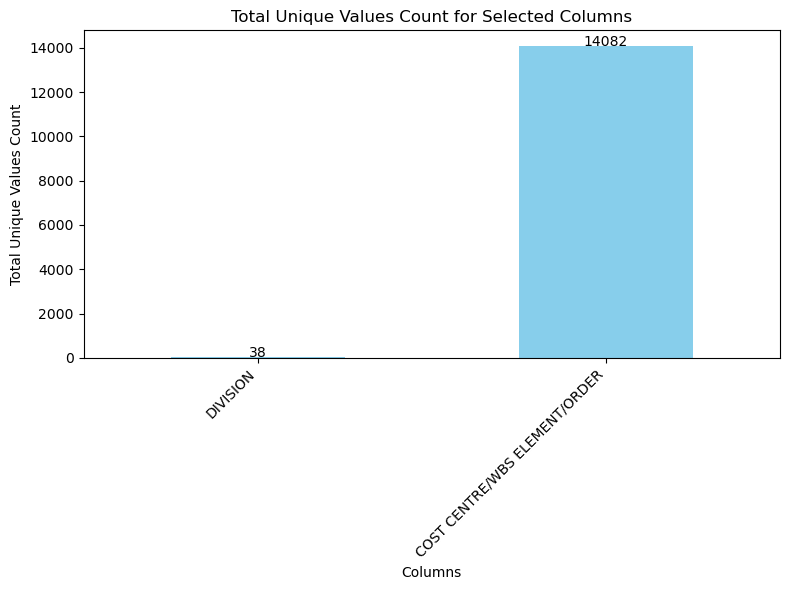

In [141]:
import matplotlib.pyplot as plt

# List of columns to visualize
selected_columns = ['DIVISION', 'COST CENTRE/WBS ELEMENT/ORDER']

# Calculate the total count of unique values for each selected column
value_counts = combined_df_4[selected_columns].nunique()

# Create a bar chart
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')

# Add count labels on top of the bars
for idx, value in enumerate(value_counts):
    plt.text(idx, value + 10, str(value), ha='center', fontsize=10)

plt.xlabel('Columns')
plt.ylabel('Total Unique Values Count')
plt.title('Total Unique Values Count for Selected Columns')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

We want to chech the data types of the columns and correct them if necessary

In [21]:
# Print the data types of columns in combined_df_3
print(combined_df_4.dtypes)

DIVISION                                      object
BATCH-TRANSACTION ID                          object
TRANSACTION DATE                              object
CARD POSTING DATE                             object
MERCHANT NAME                                 object
TRANSACTION AMOUNT                           float64
TRANSACTION CURRENCY                          object
ORIGINAL AMOUNT                              float64
ORIGINAL CURRENCY                             object
COST CENTRE/WBS ELEMENT/ORDER                 object
COST CENTRE/WBS ELEMENT/ORDER DESCRIPTION     object
G/L ACCOUNT                                   object
G/L ACCOUNT DESCRIPTION                       object
MERCHANT TYPE (MCC)                           object
MERCHANT TYPE DESCRIPTION                     object
PURPOSE                                       object
dtype: object


Before that, one row has "no_data" values. we need to change it to real date so we can use it later on.

In [22]:
# Check the frequency of "no_data" in TRANSACTION DATE column
transaction_date_no_data_count = combined_df_4['TRANSACTION DATE'].value_counts().get('no_data', 0)

# Check the frequency of "no_data" in CARD POSTING DATE column
card_posting_date_no_data_count = combined_df_4['CARD POSTING DATE'].value_counts().get('no_data', 0)

print("Frequency of 'no_data' in TRANSACTION DATE:", transaction_date_no_data_count)
print("Frequency of 'no_data' in CARD POSTING DATE:", card_posting_date_no_data_count)


Frequency of 'no_data' in TRANSACTION DATE: 1
Frequency of 'no_data' in CARD POSTING DATE: 0


In [23]:
# Filter rows where TRANSACTION DATE is "no_data"
no_data_transaction_date_rows = combined_df_4[combined_df_3['TRANSACTION DATE'] == 'no_data']

# Print the rows
no_data_transaction_date_rows

,DIVISION,BATCH-TRANSACTION ID,TRANSACTION DATE,CARD POSTING DATE,MERCHANT NAME,TRANSACTION AMOUNT,TRANSACTION CURRENCY,ORIGINAL AMOUNT,ORIGINAL CURRENCY,COST CENTRE/WBS ELEMENT/ORDER,COST CENTRE/WBS ELEMENT/ORDER DESCRIPTION,G/L ACCOUNT,G/L ACCOUNT DESCRIPTION,MERCHANT TYPE (MCC),MERCHANT TYPE DESCRIPTION,PURPOSE
447304,"PARKS, FORESTRY & RECREATION",4197-2,no_data,2016-08-18,METRO #401 NORTH YORK O,-25.01,CAD,-25.01,CAD,P11345,BANBURY CC-PRGM SUPPORT,4233,PCARD RECOVERIES,5411.0,"Grocery Stores, Supermarkets",DISPUTE RESOLUTION


Here batch id 4197-2 have no transaction date for some reason. But upon checking the 4197-1, it might be a cancelled transaction of this ID. so we will replace it with the same transaction date of 4197-1.

In [24]:
# Replace "no_data" with "8/16/2016" in TRANSACTION DATE
combined_df_4.loc[combined_df_4['TRANSACTION DATE'] == 'no_data', 'TRANSACTION DATE'] = '8/16/2016'

Now 'combined_df_4' has 'TRANSACTION DATE' and 'CARD POSTING DATE' columns as datetime

In [25]:
# Assuming combined_df_4 is already defined
combined_df_5 = combined_df_4.copy()

# Convert 'TRANSACTION DATE' and 'CARD POSTING DATE' columns to datetime
date_columns = ['TRANSACTION DATE', 'CARD POSTING DATE']
combined_df_5[date_columns] = combined_df_5[date_columns].apply(pd.to_datetime)

# Print data types of the columns after conversion
print("Data types after conversion:")
combined_df_5.dtypes

Data types after conversion:


DIVISION                                             object
BATCH-TRANSACTION ID                                 object
TRANSACTION DATE                             datetime64[ns]
CARD POSTING DATE                            datetime64[ns]
MERCHANT NAME                                        object
TRANSACTION AMOUNT                                  float64
TRANSACTION CURRENCY                                 object
ORIGINAL AMOUNT                                     float64
ORIGINAL CURRENCY                                    object
COST CENTRE/WBS ELEMENT/ORDER                        object
COST CENTRE/WBS ELEMENT/ORDER DESCRIPTION            object
G/L ACCOUNT                                          object
G/L ACCOUNT DESCRIPTION                              object
MERCHANT TYPE (MCC)                                  object
MERCHANT TYPE DESCRIPTION                            object
PURPOSE                                              object
dtype: object

Now, there are still nuisance data like with "****". This might be due to human or computer errror.

In [26]:
# Find columns with "*" values
columns_with_star = combined_df_5.columns[combined_df_4.apply(lambda col: any('*' in str(value) for value in col)
                                                              and not any(isinstance(value, pd.Timestamp) for value in col), axis=0)]

# Print the columns with "*"
print("Columns with '*' values:")
for col in columns_with_star:
    print(col)

Columns with '*' values:
MERCHANT NAME
COST CENTRE/WBS ELEMENT/ORDER
G/L ACCOUNT
PURPOSE


In [27]:
import pandas as pd

# Assuming combined_df_5 is already defined
combined_df_6 = combined_df_5.copy()

# Assuming combined_df_5 is your DataFrame
columns_to_check = ['MERCHANT NAME', 'COST CENTRE/WBS ELEMENT/ORDER', 'G/L ACCOUNT']

for column in columns_to_check:
    combined_df_6[column] = combined_df_6[column].apply(lambda x: 'no_data' if isinstance(x, str) and '*' in x else x)

# Find columns with "*" values
columns_with_star = combined_df_6.columns[combined_df_6.apply(lambda col: any('*' in str(value) for value in col)
                                                              and not any(isinstance(value, pd.Timestamp) for value in col), axis=0)]

# Print the columns with "*"
print("Columns with '*' values:")
for col in columns_with_star:
    print(col)
    
#now, only PURPOSE has "*" values


Columns with '*' values:
PURPOSE


1. here, there are values with "*****" in MERCHANT NAME, COST CENTRE/WBS ELEMENT/ORDER, G/L ACCOUNT. I will change "******" to "no_data"
2. in PURPOSE, there is "*" which indicates no data, others have "*more*...". so i will live this column untouched for now. 

In [28]:
# Get summary statistics for all columns in the combined_df4 DataFrame
summary = combined_df_6.describe(include='all', datetime_is_numeric=True)

# Print the summary
summary

,DIVISION,BATCH-TRANSACTION ID,TRANSACTION DATE,CARD POSTING DATE,MERCHANT NAME,TRANSACTION AMOUNT,TRANSACTION CURRENCY,ORIGINAL AMOUNT,ORIGINAL CURRENCY,COST CENTRE/WBS ELEMENT/ORDER,COST CENTRE/WBS ELEMENT/ORDER DESCRIPTION,G/L ACCOUNT,G/L ACCOUNT DESCRIPTION,MERCHANT TYPE (MCC),MERCHANT TYPE DESCRIPTION,PURPOSE
count,412814,412814,412814,412814,412814,412814.000000,412814,412814.000000,412814,412814,412814,412814,412814,412814.0,412814,412814
unique,38,411362,NaN,NaN,23702,NaN,2,NaN,28,14082,5193,585,407,360.0,342,191911
top,"PARKS, FORESTRY & RECREATION",4228-231,NaN,NaN,TERANET EXPRESS,NaN,CAD,NaN,CAD,P12081,BLDG REPAIRS & RENOVATIONS - VARIOUS LOCATIONS,2600,RECREATIONAL & EDUCATIONAL SUPPLIES,5411.0,"Grocery Stores, Supermarkets",TITLE SEARCHES
freq,223907,2,NaN,NaN,20605,NaN,409867,NaN,405179,5597,16471,57011,60919,62577.0,62585,13741
mean,NaN,NaN,2015-08-29 11:24:59.303802624,2015-08-31 04:11:23.907037952,NaN,240.518181,NaN,242.851083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2010-02-24 00:00:00,2011-01-04 00:00:00,NaN,-20869.970000,NaN,-37650.820000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2013-07-26 00:00:00,2013-07-29 00:00:00,NaN,28.370000,NaN,28.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2015-11-01 00:00:00,2015-11-03 00:00:00,NaN,78.780000,NaN,78.550000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2017-10-23 00:00:00,2017-10-24 00:00:00,NaN,225.730000,NaN,224.870000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,2019-07-31 00:00:00,2019-07-31 00:00:00,NaN,61842.370000,NaN,172272.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Using this, you can already see that in TRANSACTION AMOUNT,  the lowest amount is -20869.970000 CAD. When I checkit on the data, there is no corresponding transaction when it was purchased. So need to investigate that.	

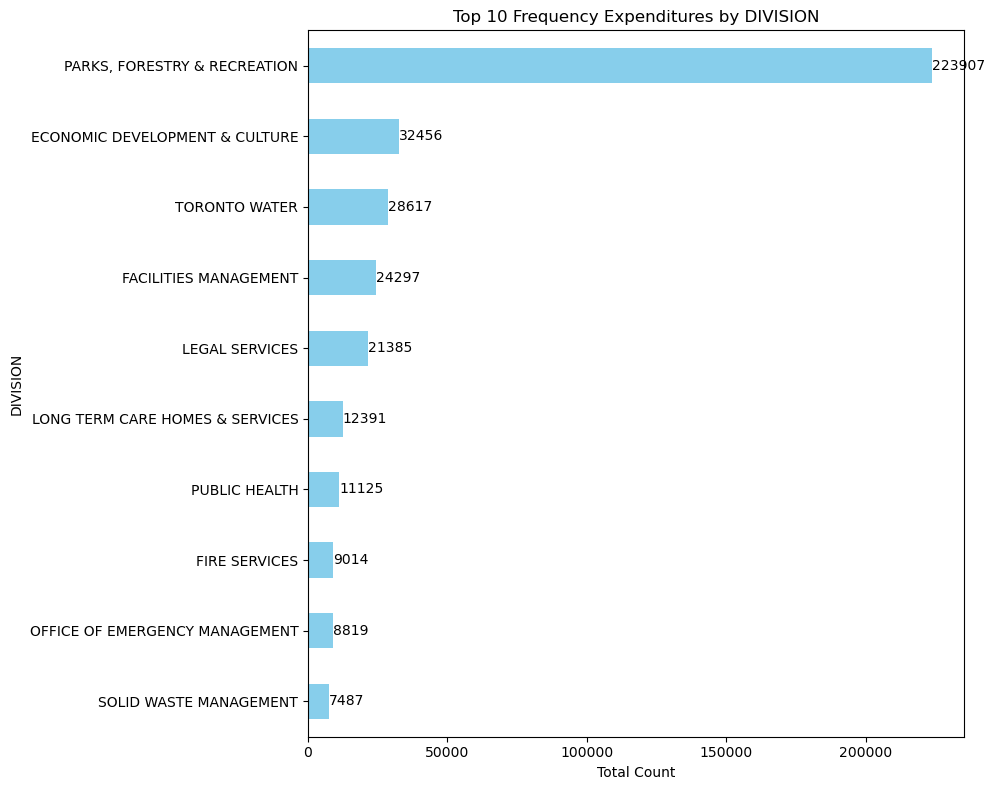

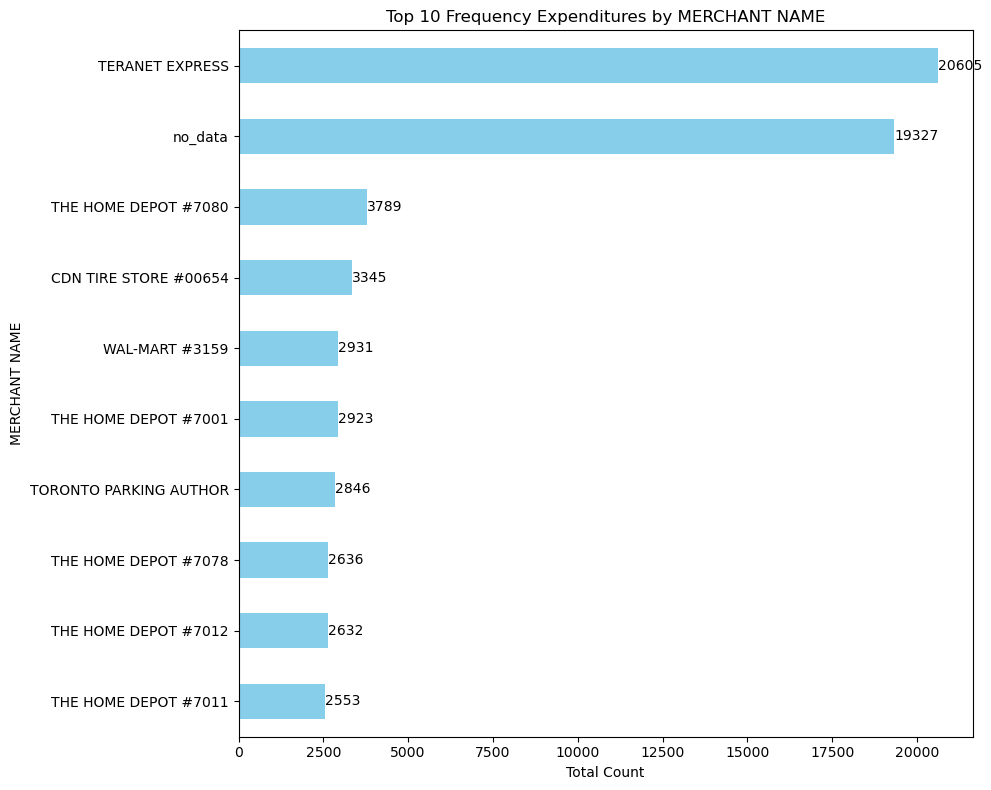

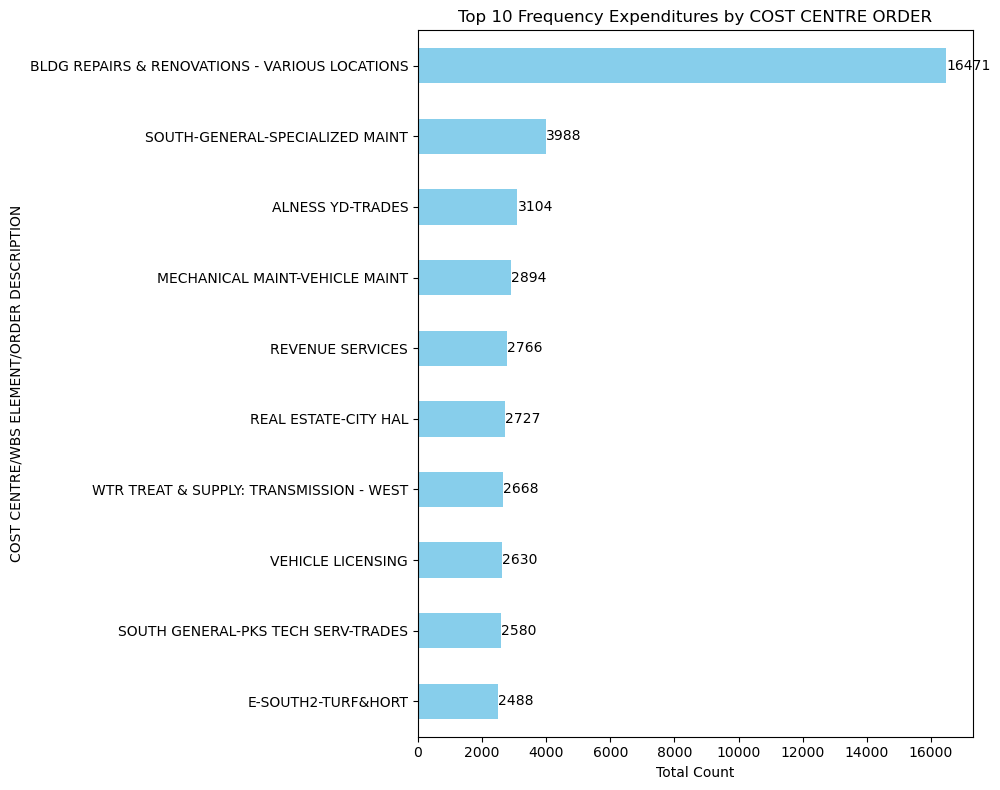

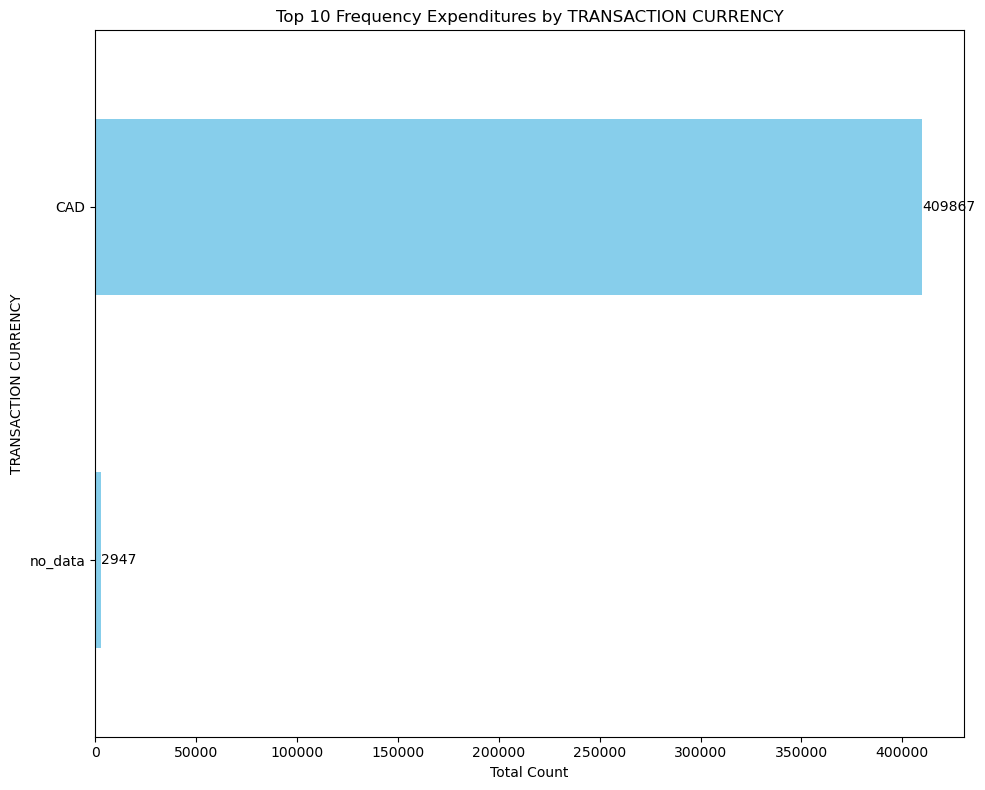

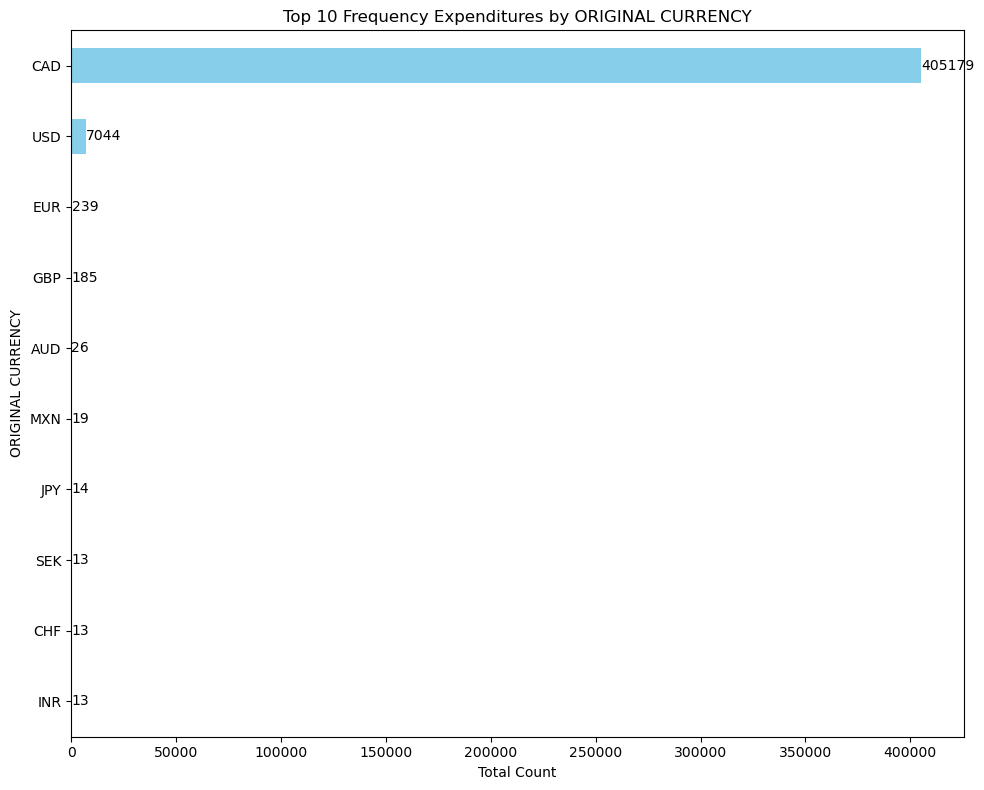

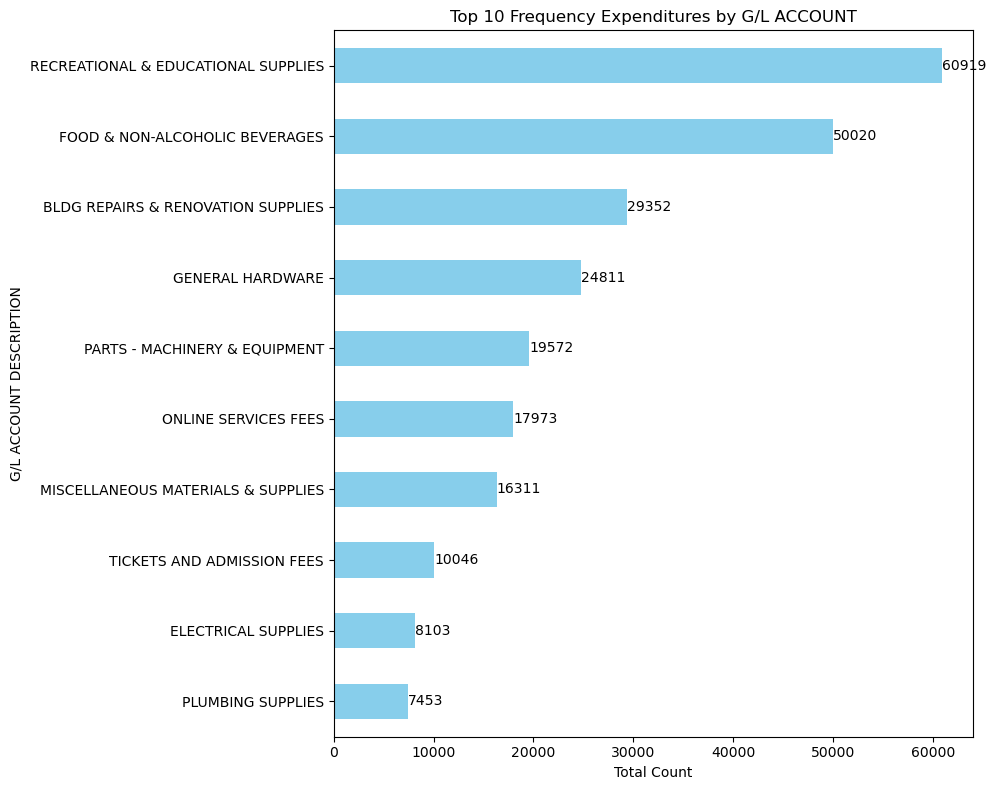

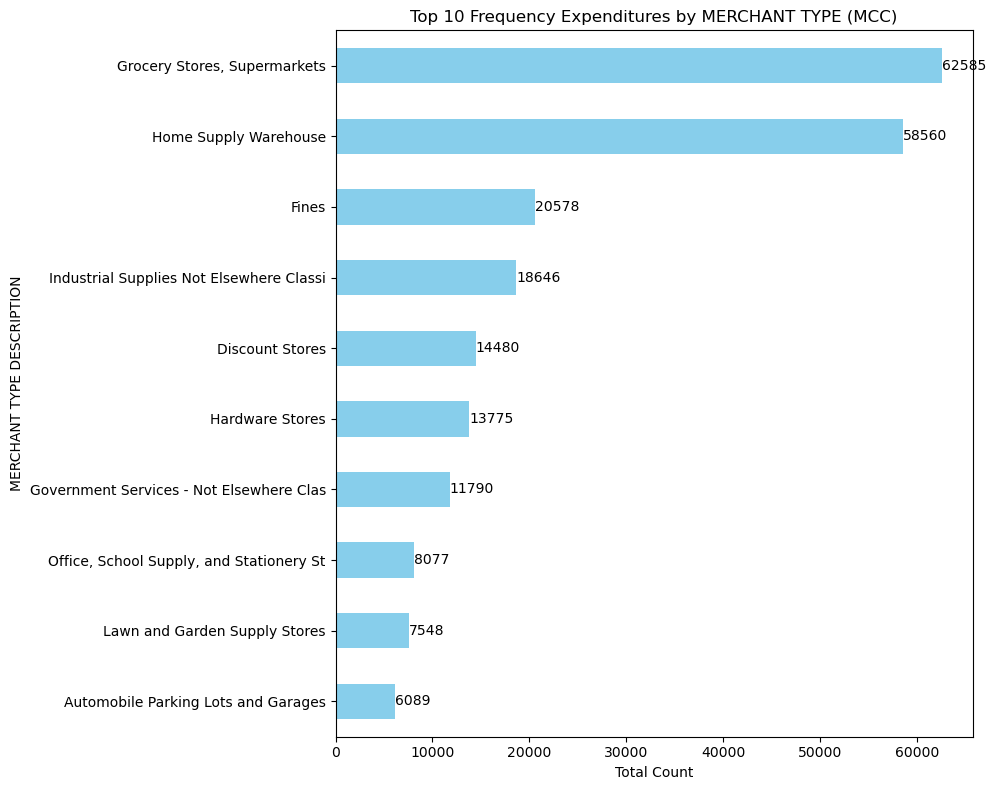

In [154]:
#Frequency distribution of some columns (top 10 only!)

import matplotlib.pyplot as plt

def plot_top_frequency(column_name, title):
    # Calculate the frequency of each unique value in the specified column
    column_counts = combined_df_6[column_name].value_counts().head(10)
    
    # Sort the column counts in descending order
    column_counts = column_counts.sort_values(ascending=True)
    
    # Create a horizontal bar chart
    plt.figure(figsize=(10, 8))
    ax = column_counts.plot(kind='barh', color='skyblue')
    
    # Add value labels on top of the bars
    for idx, value in enumerate(column_counts):
        plt.text(value, idx, str(value), va='center', fontsize=10)
    
    plt.xlabel('Total Count')
    plt.ylabel(column_name)
    plt.title(title)
    plt.tight_layout()
    
    plt.show()

# Call the function for 'DIVISION'
plot_top_frequency('DIVISION', 'Top 10 Frequency Expenditures by DIVISION')

# Call the function for 'MERCHANT NAME'
plot_top_frequency('MERCHANT NAME', 'Top 10 Frequency Expenditures by MERCHANT NAME')

# Call the function for 'COST CENTRE/WBS ELEMENT/ORDER DESCRIPTION'
plot_top_frequency('COST CENTRE/WBS ELEMENT/ORDER DESCRIPTION', 'Top 10 Frequency Expenditures by COST CENTRE ORDER')

# Call the function for 'TRANSACTION CURRENCY'
plot_top_frequency('TRANSACTION CURRENCY', 'Top 10 Frequency Expenditures by TRANSACTION CURRENCY')

# Call the function for 'ORIGINAL CURRENCY'
plot_top_frequency('ORIGINAL CURRENCY', 'Top 10 Frequency Expenditures by ORIGINAL CURRENCY')

# Call the function for 'G/L ACCOUNT DESCRIPTION'
plot_top_frequency('G/L ACCOUNT DESCRIPTION', 'Top 10 Frequency Expenditures by G/L ACCOUNT')

# Call the function for 'MERCHANT TYPE DESCRIPTION'
plot_top_frequency('MERCHANT TYPE DESCRIPTION', 'Top 10 Frequency Expenditures by MERCHANT TYPE (MCC)')

# You can add more calls for other columns as needed
# plot_top_frequency('OTHER COLUMN', 'Title for Other Column')
# plot_top_frequency('ANOTHER COLUMN', 'Title for Another Column')

The graph above shows some frequency of the features. 

1. In Division, "PARKS, FORESTRY & RECREATION" has the highest frequency among other. the difference is significant.
2. For Merchant name, "TERANET EXPRESS" was the most frequent merchant in the dataset.

etc

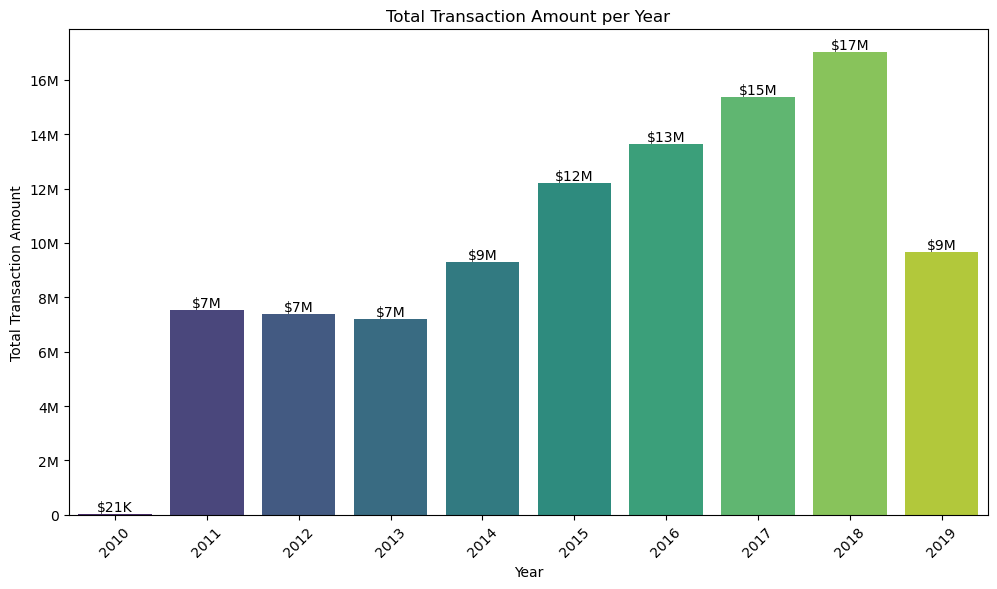

In [29]:
#Total Amount of Transcations per Year

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from bokeh.plotting import figure, show

# Assuming combined_df_5 is your DataFrame
combined_df_6['TRANSACTION DATE'] = pd.to_datetime(combined_df_6['TRANSACTION DATE'])

# Group by year and sum the TRANSACTION AMOUNT
total_amount_per_year = combined_df_6.groupby(combined_df_6['TRANSACTION DATE'].dt.year)['TRANSACTION AMOUNT'].sum().reset_index()

# Function to format tick labels
def format_tick_labels(x, pos):
    if x >= 1e6:
        return f'{int(x/1e6)}M'
    elif x >= 1e3:
        return f'{int(x/1e3)}K'
    else:
        return int(x)

# Create a bar graph using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='TRANSACTION DATE', y='TRANSACTION AMOUNT', data=total_amount_per_year, palette='viridis')

plt.xlabel('Year')
plt.ylabel('Total Transaction Amount')
plt.title('Total Transaction Amount per Year')
plt.xticks(rotation=45)
plt.tight_layout()

# Apply custom tick label formatting
ax.yaxis.set_major_formatter(FuncFormatter(format_tick_labels))

# Add total sum labels on top of the bars
for idx, row in total_amount_per_year.iterrows():
    ax.text(idx, row['TRANSACTION AMOUNT'], f'${format_tick_labels(row["TRANSACTION AMOUNT"], None)}', ha='center', va='bottom', fontsize=10)

plt.show()

In [33]:
import pandas as pd

# Group data by division and calculate statistics using describe
division_describe = combined_df_6.groupby('DIVISION')['TRANSACTION AMOUNT'].describe().reset_index()

# Rename columns for clarity
division_describe.rename(columns={'mean': 'Average Amount', '50%': 'Median Amount', 'std': 'Standard Deviation', 'count': 'Number of Transactions'}, inplace=True)

# Sort the statistics by Number of Transactions in descending order
division_describe = division_describe.sort_values(by='Number of Transactions', ascending=False)

# Print the modified division statistics
division_describe

,DIVISION,Number of Transactions,Average Amount,Standard Deviation,min,25%,Median Amount,75%,max
24,"PARKS, FORESTRY & RECREATION",223907.0,187.528070,313.771822,-3000.00,32.0300,79.590,209.8550,8939.34
8,ECONOMIC DEVELOPMENT & CULTURE,32456.0,327.900984,1014.736236,-8362.00,24.2475,73.450,271.8150,61842.37
35,TORONTO WATER,28617.0,212.032727,357.971023,-2807.00,40.2400,101.690,237.1200,4288.97
9,FACILITIES MANAGEMENT,24297.0,183.472779,326.113600,-3334.26,29.4800,71.480,201.5000,3334.26
16,LEGAL SERVICES,21385.0,60.533917,206.929074,-2231.75,5.0000,10.000,33.0000,6068.52
17,LONG TERM CARE HOMES & SERVICES,12391.0,364.620000,616.947958,-5022.49,52.1950,146.050,421.2050,15645.22
26,PUBLIC HEALTH,11125.0,335.508210,677.978714,-5723.45,34.8600,109.560,367.2500,10043.44
12,FIRE SERVICES,9014.0,300.740692,617.926217,-4356.15,51.7200,82.395,293.9500,19177.50
19,OFFICE OF EMERGENCY MANAGEMENT,8819.0,283.196875,1014.589953,-3517.13,22.5000,89.300,251.8300,41205.75
30,SOLID WASTE MANAGEMENT,7487.0,191.997446,320.146331,-2515.36,43.6850,97.280,212.4950,4514.35


Table above shows the statistics of each division ranked from highest to lowest. As we can see, the top divison when it comes to number of transactions are PARKS, FORESTRY & RECREATION with and average spending amount of 187 CAD with median of 80CAD and and 313CAD standard deviation. 

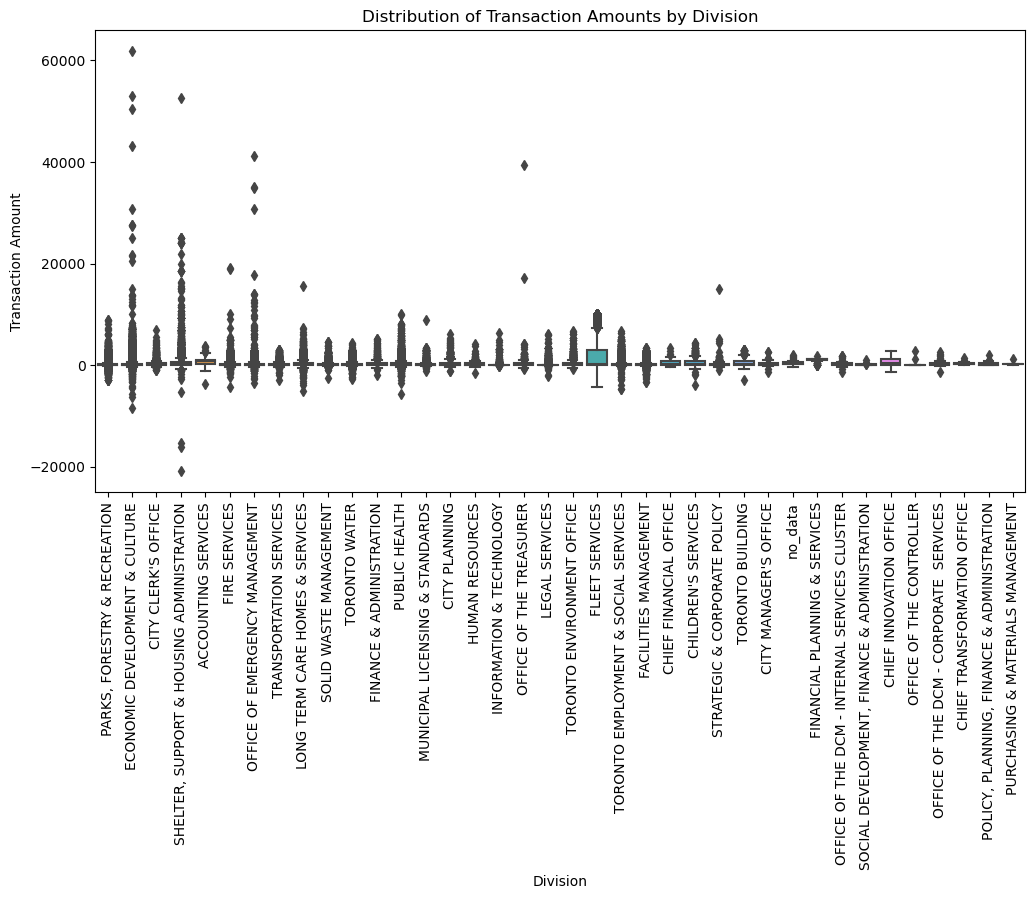

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot to visualize the distribution of transaction amounts for each division
plt.figure(figsize=(12, 6))
sns.boxplot(x='DIVISION', y='TRANSACTION AMOUNT', data=combined_df_6)
plt.xticks(rotation=90)
plt.title('Distribution of Transaction Amounts by Division')
plt.xlabel('Division')
plt.ylabel('Transaction Amount')
plt.show()

Using this graph, we can easily spot the outliers per division. For exmaple, there was a spike. in STRATEGIC AND CORPORATE POLICY in term of transactions. We will see later in details if this is anomalous. But in general, we can use this warm up us of the data we have. 

In [35]:
# Calculate the number of unique Cost Centres within each Division
cost_centre_counts = combined_df_6.groupby('DIVISION')['COST CENTRE/WBS ELEMENT/ORDER'].nunique()

# Calculate the percentage distribution of Cost Centres across Divisions
total_cost_centres = combined_df_6['COST CENTRE/WBS ELEMENT/ORDER'].nunique()
cost_centre_distribution = cost_centre_counts / total_cost_centres * 100

print("Number of unique Cost Centres within each Division:")
print(cost_centre_counts)

print("\nPercentage distribution of Cost Centres across Divisions:")
print(cost_centre_distribution)

Number of unique Cost Centres within each Division:
DIVISION
ACCOUNTING SERVICES                                 26
CHIEF FINANCIAL OFFICE                               8
CHIEF INNOVATION OFFICE                              1
CHIEF TRANSFORMATION OFFICE                          2
CHILDREN'S SERVICES                                  8
CITY CLERK'S OFFICE                                 33
CITY MANAGER'S OFFICE                               11
CITY PLANNING                                       11
ECONOMIC DEVELOPMENT & CULTURE                     207
FACILITIES MANAGEMENT                            10599
FINANCE & ADMINISTRATION                            61
FINANCIAL PLANNING & SERVICES                        4
FIRE SERVICES                                       28
FLEET SERVICES                                      18
HUMAN RESOURCES                                     15
INFORMATION & TECHNOLOGY                            10
LEGAL SERVICES                                     106
LONG

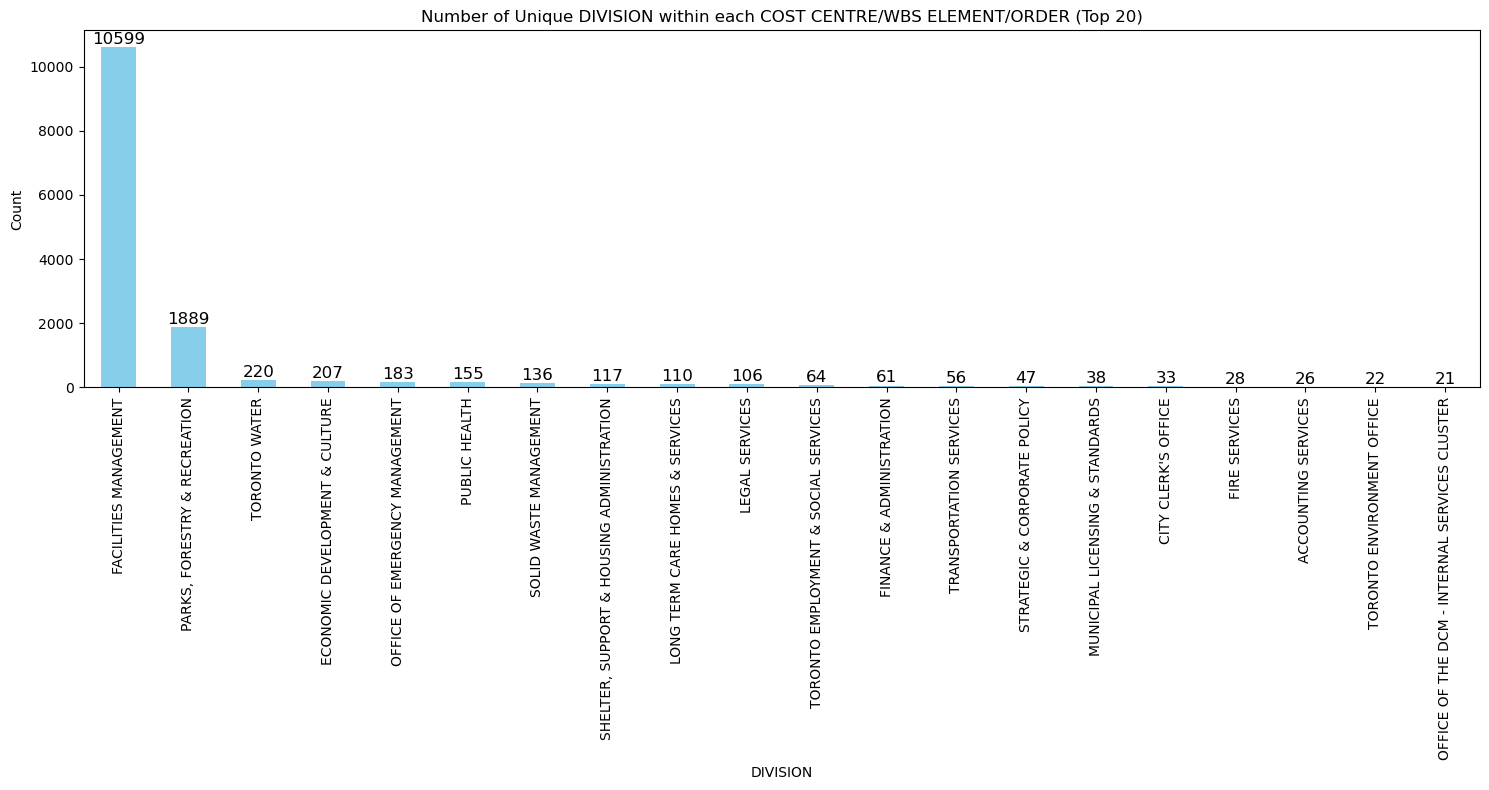

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the number of unique Cost Centres within each G/L Account
cost_centre_counts = combined_df_6.groupby('DIVISION')['COST CENTRE/WBS ELEMENT/ORDER'].nunique()

# Sort the counts in descending order
sorted_counts = cost_centre_counts.sort_values(ascending=False)

# Choose the top 20 G/L accounts
top_20_gl_accounts = sorted_counts.head(20)

# Create a bar plot for the number of unique COST CENTRE/WBS ELEMENT/ORDER for the top 20 G/L accounts
plt.figure(figsize=(15, 8))
ax = top_20_gl_accounts.plot(kind='bar', color='skyblue')
plt.title('Number of Unique DIVISION within each COST CENTRE/WBS ELEMENT/ORDER (Top 20)')
plt.xlabel('DIVISION')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Display the total count on each bar
for i, v in enumerate(top_20_gl_accounts):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


This is the frequency of the Division per Cost Center.

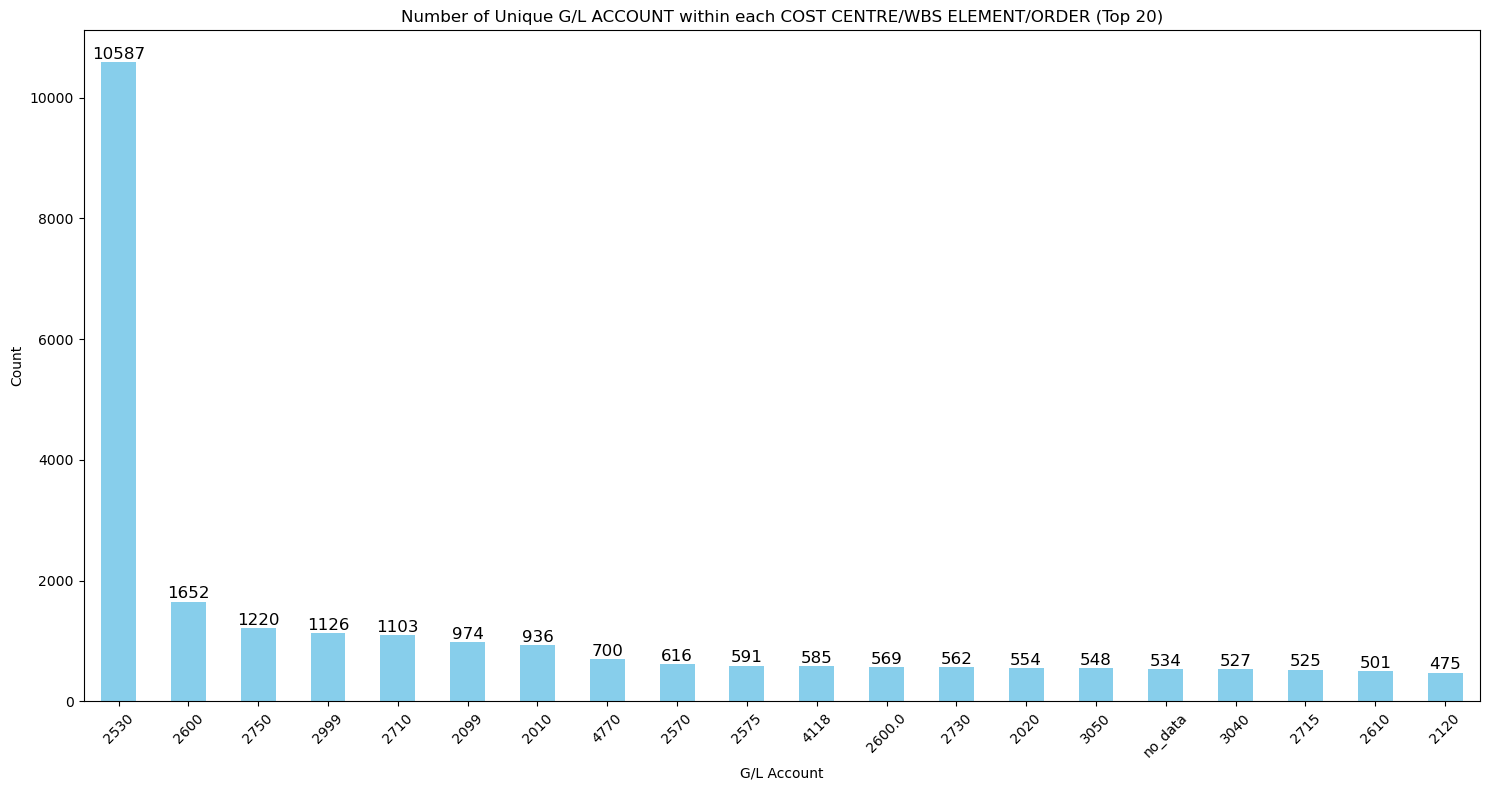

,G/L ACCOUNT,G/L ACCOUNT DESCRIPTION
6,2600.0,RECREATIONAL & EDUCATIONAL SUPPLIES
318,2600.0,AGRICULTURE & BOTANICAL SUPPLIES
1205,2600.0,JANITORIAL SUPPLIES
1780,2600.0,M & E - KITCHEN
4564,2600,RECREATIONAL & EDUCATIONAL SUPPLIES
4565,2999,MISCELLANEOUS MATERIALS & SUPPLIES
4568,2750,FOOD & NON-ALCOHOLIC BEVERAGES
4591,2099,OTHER OFFICE MATERIAL &MINOR FURNISHING
4596,2010,STATIONERY AND OFFICE SUPPLIES
4613,2710,GENERAL HARDWARE


In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the number of unique Cost Centres within each G/L Account
cost_centre_counts = combined_df_6.groupby('G/L ACCOUNT')['COST CENTRE/WBS ELEMENT/ORDER'].nunique()

# Sort the counts in descending order
sorted_counts = cost_centre_counts.sort_values(ascending=False)

# Choose the top 20 G/L accounts
top_20_gl_accounts = sorted_counts.head(20)

# Create a bar plot for the number of unique COST CENTRE/WBS ELEMENT/ORDER for the top 20 G/L accounts
plt.figure(figsize=(15, 8))
ax = top_20_gl_accounts.plot(kind='bar', color='skyblue')
plt.title('Number of Unique G/L ACCOUNT within each COST CENTRE/WBS ELEMENT/ORDER (Top 20)')
plt.xlabel('G/L Account')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Display the total count on each bar
for i, v in enumerate(top_20_gl_accounts):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# Display the corresponding G/L ACCOUNT DESCRIPTION for the top 20 G/L ACCOUNTs in a table
top_20_gl_accounts_df = combined_df_6[combined_df_6['G/L ACCOUNT'].isin(top_20_gl_accounts.index)][['G/L ACCOUNT', 'G/L ACCOUNT DESCRIPTION']].drop_duplicates()
#print(top_20_gl_accounts_df)
top_20_gl_accounts_df.head(20)


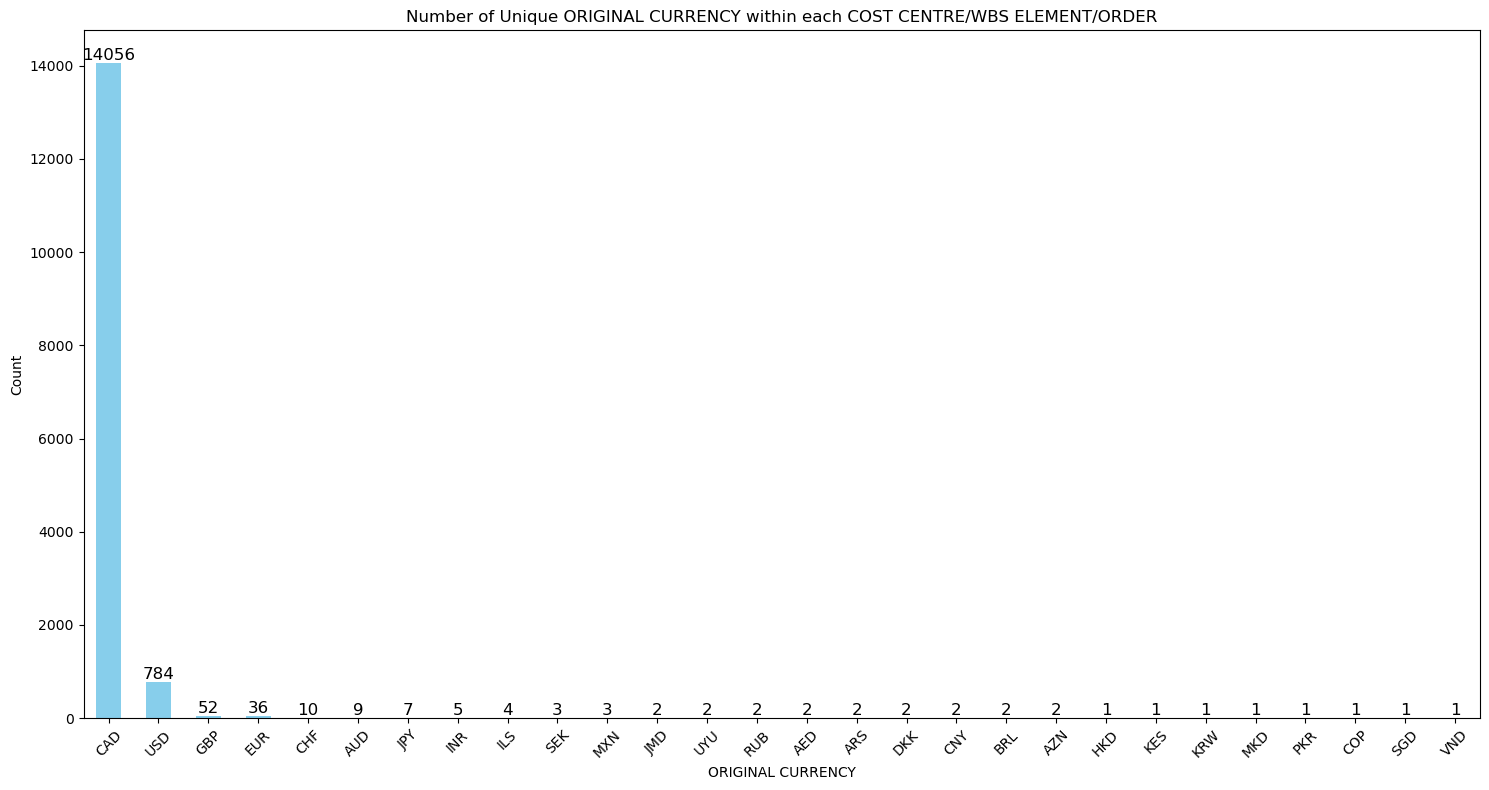

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the number of unique Cost Centres within each G/L Account
cost_centre_counts = combined_df_6.groupby('ORIGINAL CURRENCY')['COST CENTRE/WBS ELEMENT/ORDER'].nunique()

# Sort the counts in descending order
sorted_counts = cost_centre_counts.sort_values(ascending=False)

# Choose the top 20 G/L accounts
top_20_gl_accounts = sorted_counts.head(30)

# Create a bar plot for the number of unique COST CENTRE/WBS ELEMENT/ORDER for all ORIGINAL CURRENCY
plt.figure(figsize=(15, 8))
ax = top_20_gl_accounts.plot(kind='bar', color='skyblue')
plt.title('Number of Unique ORIGINAL CURRENCY within each COST CENTRE/WBS ELEMENT/ORDER')
plt.xlabel('ORIGINAL CURRENCY')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Display the total count on each bar
for i, v in enumerate(top_20_gl_accounts):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

In [49]:
#This notebook is too long, i will save the lastest df: combined_df_6 to a csv file: combined_dataset_2.csv

output_folder_path = "/Users/xaichotic/Desktop/BMA"

# Save the combined DataFrame to a CSV file
combined_csv_path = os.path.join(output_folder_path, "combined_dataset_2.csv")
combined_df_6.to_csv(combined_csv_path, index=False)